код функций - в конце файла \
нужно сначала запустить его

## Соответствующая ему система

$$ 0 = - y - 2k_1 \cdot z \cdot y - k_2 \cdot z^2 + D \cdot \frac{\partial^2 y}{\partial x^2} + \lambda $$ \
$$ 0 = - z - 2k_2 \cdot z \cdot y - k_1 \cdot y^2 + D \cdot \frac{\partial^2 z}{\partial x^2} + \lambda $$

#### граничные условия

$$y \, (A) = 0$$ \
$$y \, (- A) = 0$$ \
$$z \, (A) = 0$$ \
$$z \, (- A) = 0$$

## Решения системы
Граничные условия - первые производные

In [3]:
def boarder_values_(l):
    return np.array([l[0], l[1], l[4], l[5]])
#  0      1      2      3     4    5    6     7   
# y(-A) z(-A) y'(-A) z'(-A) y(A) z(A) y'(A) z'(A)

bc = boarder_values_

In [30]:
filename = 'ProjFiles/trace_linspace{a}_{b}_{c}.txt'.format(a = linsp[0], b = linsp[1], c = linsp[2])

# Строим график $\lambda - Det $ #

In [46]:
first_solution = [0] * 4

D = 10, A = 2.0, K1 = -5.0, K2 = 10, linspace(-10, 10, 200)


<ipython-input-44-c34cbacdaf35>:7: RuntimeWarning: overflow encountered in double_scalars
  return (y + k11 * y**2 + 2 * k12 * z * y + k13 * z**2 + la) / D    # d^2y / dx^2
<ipython-input-44-c34cbacdaf35>:7: RuntimeWarning: invalid value encountered in double_scalars
  return (y + k11 * y**2 + 2 * k12 * z * y + k13 * z**2 + la) / D    # d^2y / dx^2
<ipython-input-44-c34cbacdaf35>:14: RuntimeWarning: overflow encountered in double_scalars
  return (z + k21 * y**2 + 2 * k22 * z * y + k23 * z**2 + la) / D     # d^2z / dx^2
<ipython-input-44-c34cbacdaf35>:14: RuntimeWarning: invalid value encountered in double_scalars
  return (z + k21 * y**2 + 2 * k22 * z * y + k23 * z**2 + la) / D     # d^2z / dx^2
/Applications/anaconda3/lib/python3.8/site-packages/numpy/linalg/linalg.py:2158: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


Det Change, lambda = 5.28 
 y_approx =  [ 7.12444530e-20 -2.53853657e-20 -1.36374594e+00 -1.32650225e-01]  la =  5.276381909547739


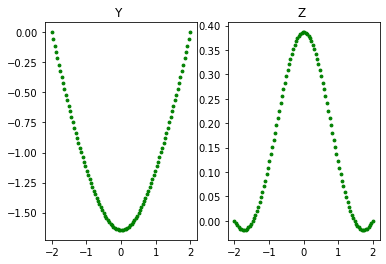

NameError: name 'first_approx' is not defined

In [48]:
# при фиксированных A, D, k1, пройдем по k2, сохраним те, на которых есть смена знака для лямбда от -10 до 10

for ij in np.linspace(-5, 5, 50):
    D, A = 10, 2.0
    K1, K2 = 10, ij
    #k11, k12, k13, k21, k22, k23 = 0, K1, K2, 0, K2, K1
    k11, k12, k13, k21, k22, k23 = 0, ij, 10, 0, 10, ij
    init_approx = first_solution
    linsp = [-10, 10, 200]
    lambdas = np.linspace(linsp[0], linsp[1], linsp[2])
    print('D = {D}, A = {A}, K1 = {K1}, K2 = {K2}, linspace({l1}, {l2}, {l3})'.format(D = D, A = A, K1 = ij, K2 = 10, l1 = linsp[0], l2 = linsp[1], l3 = linsp[2]))
    
    K = [k11, k12, k13, k21, k22, k23]
    foundflag, dets, lambdas_for_plot, last_lambda, last_approx, first_solution = lambda_iterate_break(linsp, D, K, A, init_approx, system, bc, 1000, filename)
    # break if at least one sign change found
    
    if foundflag == 1:
        k2vals.append(ij)
        k2lambdas.append(last_lambda)

fig = plt.figure(figsize=(15, 5))
ax = fig.gca()    
ax.set_xlabel("Lambda")
ax.set_ylabel("Det")
plt.scatter(lambdas_for_plot, dets, s = 3, color = 'red')
plt.title('D = {D}, A = {A}, K1 = {K1}, K2 = {K2}, linspace({l1}, {l2}, {l3})'.format(D = D, A = A, K1 = ij, K2 = 10, l1 = linsp[0], l2 = linsp[1], l3 = linsp[2]))
plt.grid()
plt.show()

Что происходит в точке около 17? (см график нормы)

D = 10, A = 2.0, K1 = 1.57, K2 = 10, linspace(-3, 21, 1000)


<ipython-input-269-c34cbacdaf35>:7: RuntimeWarning: overflow encountered in double_scalars
  return (y + k11 * y**2 + 2 * k12 * z * y + k13 * z**2 + la) / D    # d^2y / dx^2
<ipython-input-269-c34cbacdaf35>:7: RuntimeWarning: invalid value encountered in double_scalars
  return (y + k11 * y**2 + 2 * k12 * z * y + k13 * z**2 + la) / D    # d^2y / dx^2
<ipython-input-269-c34cbacdaf35>:14: RuntimeWarning: overflow encountered in double_scalars
  return (z + k21 * y**2 + 2 * k22 * z * y + k23 * z**2 + la) / D     # d^2z / dx^2
<ipython-input-269-c34cbacdaf35>:14: RuntimeWarning: invalid value encountered in double_scalars
  return (z + k21 * y**2 + 2 * k22 * z * y + k23 * z**2 + la) / D     # d^2z / dx^2


Det Change, lambda = 10.24
y_approx =  [-1.51042750e-20 -2.79188760e-21 -1.82112071e+00 -2.80255065e-01]  la =  10.237237237237236


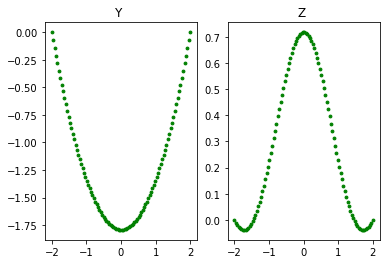

y_approx =  [-1.94258519e-20 -1.68116813e-20 -8.13861654e+00 -5.49608141e+00]  la =  21.0


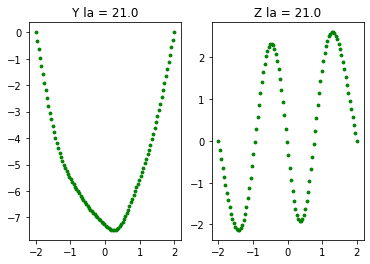

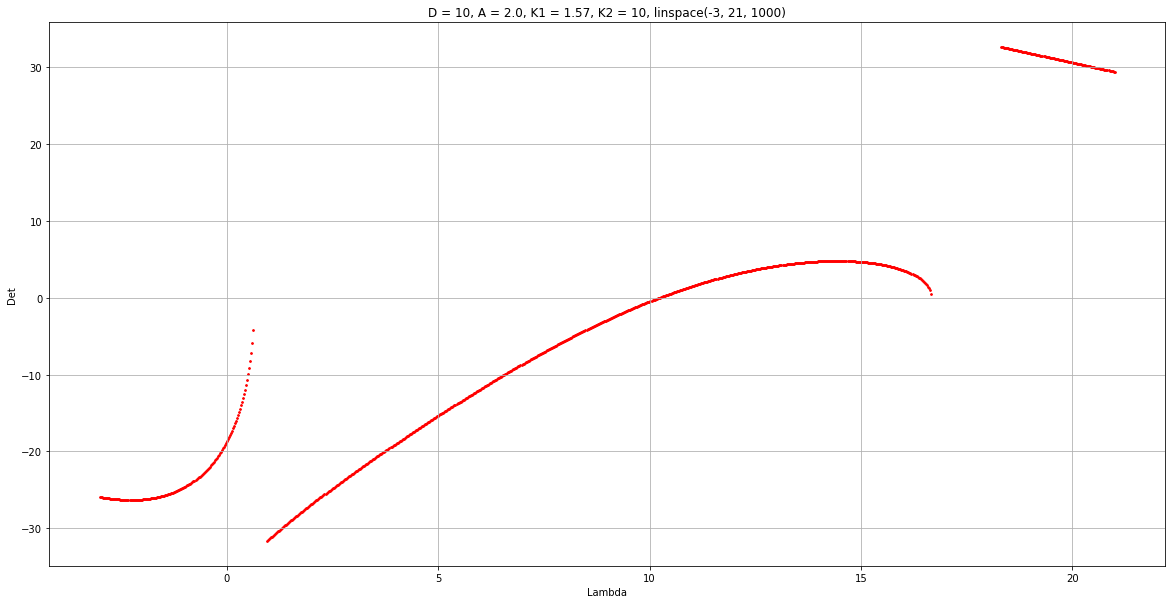

In [343]:
for ij in [1.57]:
    D, A = 10, 2.0
    K1, K2 = ij, 10
    #k11, k12, k13, k21, k22, k23 = 0, K1, K2, 0, K2, K1
    k11, k12, k13, k21, k22, k23 = 0, ij, 10, 0, 10, ij
    init_approx = [0] * 4
    linsp = [-3, 21, 1000]
    lambdas = np.linspace(linsp[0], linsp[1], linsp[2])
    print('D = {D}, A = {A}, K1 = {K1}, K2 = {K2}, linspace({l1}, {l2}, {l3})'.format(D = D, A = A, K1 = ij, K2 = 10, l1 = linsp[0], l2 = linsp[1], l3 = linsp[2]))
    
    K = [k11, k12, k13, k21, k22, k23]
    
    dets, lambdas_for_plot, lambdas_mistake_zerodet, lambdas_mistake_nan, lambdas_mistake_cycle = lambda_iterate(linsp, D, K, A, init_approx, system, bc, 1000, filename)
    # scatterNoBlowouts(lambdas_for_plot, dets, 'D = ' + str(D) + '; ' + str(K), plot = True)
    
    fig = plt.figure(figsize=(20, 10))
    ax = fig.gca()    
    ax.set_xlabel("Lambda")
    ax.set_ylabel("Det")
    plt.scatter(lambdas_for_plot, dets, s = 3, color = 'red')
    plt.title('D = {D}, A = {A}, K1 = {K1}, K2 = {K2}, linspace({l1}, {l2}, {l3})'.format(D = D, A = A, K1 = ij, K2 = 10, l1 = linsp[0], l2 = linsp[1], l3 = linsp[2]))
    plt.grid()
    plt.show()

# Код

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import det, inv, svd, norm
import random

In [5]:
colors = ['(255, 140, 0)', '(255, 69, 0)', '(154, 205, 50)', '(128, 128, 0)', '(85, 107, 47)',
              '(0, 128, 128)', '(70, 130, 180)', '(139, 69, 19)', '(105, 105, 105)']
random.shuffle(colors)
colors = [tuple(map(lambda x: int(x) / 255, color[1:-1].split(', '))) for color in colors]

In [31]:
# график лямбда - det, оставить только точки по модулю < 1
def scatterNoBlowouts(lambdas_for_plot, dets, Title, plot = False):
    n = len(dets)
    ind = list(filter(lambda i: abs(dets[i]) < 1, list(range(n))))
    
    fig = plt.figure(figsize=(20, 8))
    ax = fig.gca()
    
    x = [lambdas_for_plot[i] for i in ind]
    y = [dets[i] for i in ind]
    d = ((max(y) + 0.1) - (min(y) - 0.1)) / 20
    ax.set_yticks(np.arange(min(y) - 0.1, max(y) + 0.1, d))
    c = ((max(x) + 1) - (min(x) - 1)) / 25
    ax.set_xticks(np.arange(min(x) - 1, max(x) + 1, c))
    #ax.set_xticks(np.arange(-4, 4, 0.25))
    ax.set_xlabel("Lambda")
    ax.set_ylabel("Det")
    plt.scatter(x, y)
    if plot:
        plt.plot(x, y, color = 'gray')
    plt.title(Title)
    plt.grid()
    plt.show()

    
# график лямбда - det, оставить только точки по модулю < 2
def scatterAll(lambdas_for_plot, dets, lambdas_mistake_zerodet, lambdas_mistake_nan, lambdas_mistake_cycle, Title, plot = False):
    n = len(dets)
    ind = list(filter(lambda i: abs(dets[i]) < 2, list(range(n))))
    
    fig = plt.figure(figsize=(20, 8))
    ax = fig.gca()
    
    x = [lambdas_for_plot[i] for i in ind]
    y = [dets[i] for i in ind]
    
    ax.set_yticks(np.arange(-1.1, 1.1, 0.1))
    c = ((max(x) + 1) - (min(x) - 1)) / 25
    ax.set_xticks(np.arange(min(x) - 1, max(x) + 1, c))
    #ax.set_xticks(np.arange(-4, 4, 0.25))
    ax.set_xlabel("Lambda")
    ax.set_ylabel("Det")
    plt.scatter(x, y, color = 'steelblue', s = 8)
    plt.scatter(lambdas_mistake_zerodet, [0] * len(lambdas_mistake_zerodet), s = 15, color = 'green', label = 'zero det')
    plt.scatter(lambdas_mistake_nan, [0] * len(lambdas_mistake_nan), s = 8, color = 'orange', label = 'nans in matrix')
    plt.scatter(lambdas_mistake_cycle, [0] * len(lambdas_mistake_cycle), s = 15, color = 'red', label = 'too many steps')
    if plot:
        plt.plot(x, y, color = 'gray')
    plt.title(Title)
    plt.legend()
    plt.grid()
    plt.show()

In [41]:
glob_vals = []

def lambda_iterate_break(linsp, D, K, A, init_approx, system, bc, draw_nth, filename):
    global k11, k12, k13, k21, k22, k23
    k11, k12, k13, k21, k22, k23 = K
    SignChangeFileIterate = open('ProjFiles/SignChangeIterate.txt', 'a')
    Lambdas0File = open('ProjFiles/Lambdas0File_{D}_{k11}_{k12}_{k13}.txt'.format(D = D, k11 = k11, k12 = k12, k13 = k13), 'a')
    print('\n', 'linspace ({l1}, {l2}, {l3})------'.format(l1 = linsp[0], l2 = linsp[1], l3 = linsp[2]), '\n', file = Lambdas0File)
    
    global la
    params, bc_params = [], []
    lambdas = np.linspace(linsp[0], linsp[1], linsp[2])
    lambdas_for_plot, dets, lambdas_mistake_zerodet = [], [], []
    y_approx = init_approx
    firstfound = 0
    firstapprox = []
    for la in lambdas:
        
        result = shooting(np.linspace(-A, A, 100), y_approx, system, params, bc, bc_params, filename)
        if result[0] != 0:
            if result[0] == 1: 
                lambdas_mistake_zerodet.append(la) # det ~= 0
            continue
        if firstfound == 0:
            firstapprox = result[1]  # решение на левом конце промежутка для следующих итераций, первое найденное
            firstfound = 1
        
    # точка смены знака
        if len(dets) > 0 and result[3] * dets[-1] < 0:
            print('\n', D, K, A, y_approx, la, file = SignChangeFileIterate)
            print('Det Change, lambda = {lamb}'.format(lamb = round(la, 2)), '\n', "y_approx = ", y_approx, " la = ", la)
            steps, yval, zval = grkutta(system, result[1], np.linspace(-A, A, 100), '')
            print(list(steps), '\n', yval, '\n', zval, '\n', file =  SignChangeFileIterate)
            return 1, dets, lambdas_for_plot, la, y_approx, first_approx #  foundflag, dets, lambdas_for_plot, last_lambda, last_approx, first_solution
        y_approx = result[1]
        lambdas_for_plot.append(la)
        dets.append(result[3])
    
    SignChangeFile.close()
    Lambdas0File.close()
    return 0, dets, lambdas_for_plot, la, y_approx, first_approx

In [42]:
def norm_param(linsp, D, K, A, init_approx, system, bc, bc_params):
    global k11, k12, k13, k21, k22, k23
    k11, k12, k13, k21, k22, k23 = K
    
    global la
    params, bc_params = [], []
    lambdas = np.linspace(linsp[0], linsp[1], linsp[2])
    lambdas_for_plot, dets = [], []
    lambdas_mistake_zerodet, lambdas_mistake_nan, lambdas_mistake_cycle = [], [], []
    
    y_approx = init_approx
    cnt = 0
    y_norm, z_norm = [], []
    for la in lambdas:
        cnt += 1
        result = shooting(np.linspace(-A, A, 100), y_approx, system, params, bc, bc_params, filename)
        if result[0] != 0:
            if result[0] == 1:
                lambdas_mistake_zerodet.append(la) # det ~= 0
            if result[0] == 2:
                lambdas_mistake_nan.append(la) # nans in matrix
            if result[0] == 3:
                lambdas_mistake_cycle.append(la) # too many steps
            continue
        
        # сохранить точку смены знака
        #if len(dets) > 0 and result[3] * dets[-1] < 0:
        steps, yval, zval = grkutta_(system, result[1], np.linspace(-A, A, 100), '')
        
        y_approx = result[1]
        y_norm.append(np.linalg.norm(yval))
        z_norm.append(np.linalg.norm(zval))
        lambdas_for_plot.append(la)
        dets.append(result[3])
    
    return lambdas_for_plot, y_norm, z_norm #, yval, zval  #  last obtained solutions

In [43]:
def grkutta(f, y_value, steps, title):   # runge_kutta(f, y_value, steps) + graph
    y = np.hstack((steps[0], y_value.copy()))
    yval, zval = [y[1]], [y[2]]
    for i in range(1, len(steps)):
        h = steps[i] - steps[i - 1]
        t1 = steps[i]
        k1 = count(f, y, 0, np.array([0] * (len(y) - 1)))
        k2 = count(f, y, h / 2, k1 * h / 2)
        k3 = count(f, y, h / 2, k2 * h / 2)
        k4 = count(f, y, h, k3 * h)
        y[1:] += h * (k1 + 2 * k2 + 2 * k3 + k4) / 6
        y[0] = t1
        yval.append(y[1])
        zval.append(y[2])

    fig, (yax, zax) = plt.subplots(1, 2)
    yax.scatter(steps, yval, s = 8, color = 'green')
    yax.set_title('Y ' + title)
    zax.scatter(steps, zval, s = 8, color = 'green')
    zax.set_title('Z ' + title)
    plt.show()
    return list(steps), yval, zval

def grkutta_(f, y_value, steps, title):   # runge_kutta(f, y_value, steps) + graph
    y = np.hstack((steps[0], y_value.copy()))
    yval, zval = [y[1]], [y[2]]
    for i in range(1, len(steps)):
        h = steps[i] - steps[i - 1]
        t1 = steps[i]
        k1 = count(f, y, 0, np.array([0] * (len(y) - 1)))
        k2 = count(f, y, h / 2, k1 * h / 2)
        k3 = count(f, y, h / 2, k2 * h / 2)
        k4 = count(f, y, h, k3 * h)
        y[1:] += h * (k1 + 2 * k2 + 2 * k3 + k4) / 6
        y[0] = t1
        yval.append(y[1])
        zval.append(y[2])
    return list(steps), yval, zval



def count(f, args, h, k):
    ''' calculates f(args[0] + h, args[1:] + k) '''
    res = []
    args0 = args.copy()
    args0[0] += h
    args0[1:] += k
    for i in range(len(f)):
        res.append(f[i](args0))
    return np.array(res)


def runge_kutta(f, y_value, steps):
    y = np.hstack((steps[0], y_value.copy()))
    for i in range(1, len(steps)):
        h = steps[i] - steps[i - 1]
        t1 = steps[i]
        k1 = count(f, y, 0, np.array([0] * (len(y) - 1)))
        k2 = count(f, y, h / 2, k1 * h / 2)
        k3 = count(f, y, h / 2, k2 * h / 2)
        k4 = count(f, y, h, k3 * h)
        y[1:] += h * (k1 + 2 * k2 + 2 * k3 + k4) / 6
        y[0] = t1
    return y[1:]



def shooting(time_steps, y_approx, f, params, bc, bc_params, sourceFilename, solver=runge_kutta):
    global la
    boarder_values = bc
    y_value = y_approx
    space = time_steps
    #----
    eps = 1e-4
    step = 0
    
    determ = 0.0
    cnt = 0
    sourceFile = open(sourceFilename, 'a')
    zeroDetFile = open('zeroDet.txt', 'a')
    while True:
        step += 1
        add = runge_kutta(f, y_value, space)
        
        redisuals = np.hstack((y_value, add))     #   невязки
        redisuals = boarder_values(np.hstack((y_value, add)))
        # ----------------------------------------------------------------------------------------------------
        #if np.linalg.norm(redisuals) < 1e-6:
        #    return 0, y_value, add, determ
        if (np.abs(redisuals) < 1e-6).all():
            return 0, y_value, add, determ
            # break
        # ----------------------------------------------------------------------------------------------------
        D = np.eye(len(f))
        for i in range(len(f)):
            y = y_value.copy()
            y[i] += eps
            dadd = runge_kutta(f, y, space)
            dres = np.hstack((y, dadd))
            # dr = norm(boarder_values, dres)
            dr = boarder_values(dres)
            D[:, i] = (dr - redisuals) / eps
        determ = np.linalg.det(D)

        if abs(determ) < 1e-6:
            print("det ~= 0", D, file = sourceFile)
            print("det ~= 0", D, file = zeroDetFile)
            return 1, y_value, add, determ
        
        if np.isnan(D).any():
            print('nan!!!', file = sourceFile)
            return 2, y_value, add, determ
        
        if step > 50:
            print("step > 50", "det =", determ, file = sourceFile)
            return 3, y_value, add, determ
        y_value = y_value - np.linalg.pinv(D) @ redisuals       # Newton
    sourceFile.close()

In [44]:
def F1(args):
    x, y, z, dy, dz = args[:5]
    return dy
def F2(args):
    global la, k11, k12, k13
    x, y, z, dy, dz = args[:5]
    return (y + k11 * y**2 + 2 * k12 * z * y + k13 * z**2 + la) / D    # d^2y / dx^2
def G1(args):
    x, y, z, dy, dz = args[:5]
    return dz
def G2(args):
    global la, k21, k22, k23
    x, y, z, dy, dz = args[:5]
    return (z + k21 * y**2 + 2 * k22 * z * y + k23 * z**2 + la) / D     # d^2z / dx^2

system = [F1, G1, F2, G2]

def boarder_values(l):
    return np.array([l[0], l[1], l[4], l[5]])
#  0      1      2      3     4    5    6     7   
# y(-A) z(-A) y'(-A) z'(-A) y(A) z(A) y'(A) z'(A)


bc = boarder_values

------------------------------------------------------


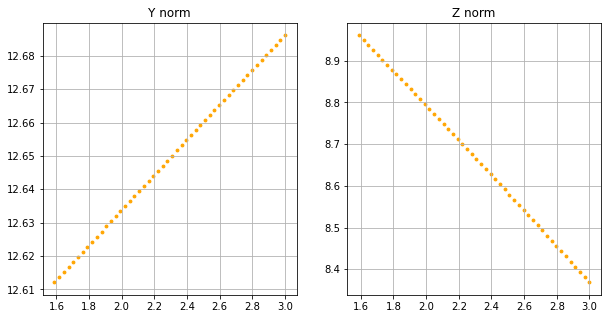

In [45]:
L = 1.588235
K1, K2, D, A = 1.57, 10, 10, 2.0
linsp = [L, 3, 50]
K = [0, K1, K2, 0, K2, K1]

y0 = [-1.26, 0.06, 0, 0]
#norm_param_graph(linsp, np.linspace(-A, A, 100), y0, system, bc, [])

print("------------------------------------------------------")
y0 = [ 0, 0, -1.797, -1.7048]
steps, y_norm, z_norm = norm_param(linsp, D, K, A, y0, system, bc, [])
# norm_param_graph(linsp, D, K, A, init_approx, system, bc, bc_params):
fig, (yax, zax) = plt.subplots(1, 2, figsize=(10, 5))
yax.scatter(steps, y_norm, s = 8, color = 'orange')
yax.set_title('Y norm')
yax.grid()
zax.scatter(steps, z_norm, s = 8, color = 'orange')
zax.set_title('Z norm')
zax.grid()
plt.show()


------
--------